In [1]:
example_1 = """.....
.S-7.
.|.|.
.L-J.
....."""

example_2 = """..F7.
.FJ|.
SJ.L7
|F--J
LJ..."""

In [2]:
with open("./data/Day 10/input.txt") as f:
    data = f.read()

In [3]:
import numpy as np

In [4]:
def parse_input(input_str: str) -> np.array:
    return np.array([list(row) for row in input_str.splitlines()])

In [5]:
def get_monster_start(maze: np.array) -> tuple[int, int]:
    indexes = np.where(maze == "S")
    return (indexes[0][0], indexes[1][0])

In [6]:
def check_connected_pipe(maze: np.array, previous: tuple[int, int], new: tuple[int, int]) -> bool:
    diff_y = new[0] - previous[0]
    diff_x = new[1] - previous[1]
    if (maze[new] == '.'):
        return False
    elif (maze[new] == "|" or maze[new] == "L" or maze[new] =="J") and diff_y == 1:
        return True
    elif (maze[new] == "|" or maze[new] == "F" or maze[new] =="7") and diff_y == -1:
        return True
    elif (maze[new] == "-" or maze[new] == "J" or maze[new] =="7") and diff_x == 1:
        return True
    elif (maze[new] == "-" or maze[new] == "F" or maze[new] =="L") and diff_x == -1:
        return True
    elif (maze[new] == "S"):
        return True
    else:
        return False

In [7]:
def get_next_position(maze: np.array, previous: tuple[int, int], current: tuple[int, int]) -> tuple[int, int]:
    diff_y = current[0] - previous[0]
    diff_x = current[1] - previous[1]
    if (maze[current] == "|") and diff_y == 1:
        return (current[0]+1, current[1])
    elif (maze[current] == "|") and diff_y == -1:
        return (current[0]-1, current[1])
    elif (maze[current] == "-") and diff_x == 1:
        return (current[0], current[1]+1)
    elif (maze[current] == "-") and diff_x == -1:
        return (current[0], current[1]-1)
    elif (maze[current] == "L") and diff_y == 1:
        return (current[0], current[1]+1)
    elif (maze[current] == "L") and diff_x == -1:
        return (current[0]-1, current[1])
    elif (maze[current] == "J") and diff_y == 1:
        return (current[0], current[1]-1)
    elif (maze[current] == "J") and diff_x == 1:
        return (current[0]-1, current[1])
    elif (maze[current] == "7") and diff_y == -1:
        return (current[0], current[1]-1)
    elif (maze[current] == "7") and diff_x == 1:
        return (current[0]+1, current[1])
    elif (maze[current] == "F") and diff_y == -1:
        return (current[0], current[1]+1)
    elif (maze[current] == "F") and diff_x == -1:
        return (current[0]+1, current[1])
    elif (maze[current] == "S"):
        return current
    else:
        print("Error")

In [8]:
def track_pipe_network(maze: np.array, start_index: tuple[int]):
    current_index = start_index
    indexes_to_check = [(current_index[0] - 1, current_index[1]), (current_index[0] + 1, current_index[1]), (current_index[0], current_index[1] -1), (current_index[0], current_index[1]+1)]
    for current_index in indexes_to_check:
        pipe_network = list()
        prev_index = start_index
        steps = 0
        while check_connected_pipe(maze, prev_index, current_index) and start_index not in pipe_network:
            pipe_network.append(current_index)
            temp_cur_index = current_index
            current_index = get_next_position(maze, prev_index, current_index)
            prev_index = temp_cur_index
            steps += 1
        if start_index in pipe_network:
            break
    return round(steps/2), pipe_network

# Part 1

In [9]:
example_1_maze = parse_input(example_1)
example_1_start = get_monster_start(example_1_maze)
example_1_monster_steps, example_1_pipe_network = track_pipe_network(example_1_maze, example_1_start)
example_1_monster_steps

4

In [10]:
example_2_maze = parse_input(example_2)
example_2_start = get_monster_start(example_2_maze)
example_2_monster_steps, example_2_pipe_network = track_pipe_network(example_2_maze, example_2_start)
example_2_monster_steps

8

In [11]:
maze = parse_input(data)
start = get_monster_start(maze)
monster_steps, pipe_network = track_pipe_network(maze, start)
monster_steps

6690

# Part 2

In [12]:
example_3 = """...........
.S-------7.
.|F-----7|.
.||.....||.
.||.....||.
.|L-7.F-J|.
.|..|.|..|.
.L--J.L--J.
..........."""

example_4 = """.F----7F7F7F7F-7....
.|F--7||||||||FJ....
.||.FJ||||||||L7....
FJL7L7LJLJ||LJ.L-7..
L--J.L7...LJS7F-7L7.
....F-J..F7FJ|L7L7L7
....L7.F7||L7|.L7L7|
.....|FJLJ|FJ|F7|.LJ
....FJL-7.||.||||...
....L---J.LJ.LJLJ..."""

example_5 = """FF7FSF7F7F7F7F7F---7
L|LJ||||||||||||F--J
FL-7LJLJ||||||LJL-77
F--JF--7||LJLJ7F7FJ-
L---JF-JLJ.||-FJLJJ7
|F|F-JF---7F7-L7L|7|
|FFJF7L7F-JF7|JL---7
7-L-JL7||F7|L7F-7F7|
L.L7LFJ|||||FJL7||LJ
L7JLJL-JLJLJL--JLJ.L"""

In [13]:
example_3_maze = parse_input(example_3)
example_3_start = get_monster_start(example_3_maze)
example_3_monster_steps, example_3_pipe_network = track_pipe_network(example_3_maze, example_3_start)

In [14]:
example_4_maze = parse_input(example_4)
example_4_start = get_monster_start(example_4_maze)
example_4_monster_steps, example_4_pipe_network = track_pipe_network(example_4_maze, example_4_start)

example_5_maze = parse_input(example_5)
example_5_start = get_monster_start(example_5_maze)
example_5_monster_steps, example_5_pipe_network = track_pipe_network(example_5_maze, example_5_start)

In [15]:
from shapely import Polygon, Point

In [16]:
def get_interior_coords(enclosed_polygon: Polygon) -> list[tuple[int, int]]:
    min_x, min_y, max_x, max_y = enclosed_polygon.bounds
    interior_coords = []
    for x in range(int(min_x), int(max_x + 1)):
        for y in range(int(min_y), int(max_y + 1)):
            if enclosed_polygon.contains(Point(x, y)):
                interior_coords.append((x, y))
    return interior_coords

In [17]:
example_3_polygon = Polygon(example_3_pipe_network)
len(get_interior_coords(example_3_polygon))

4

In [18]:
example_4_polygon = Polygon(example_4_pipe_network)
len(get_interior_coords(example_4_polygon))

8

In [19]:
example_5_polygon = Polygon(example_5_pipe_network)
len(get_interior_coords(example_5_polygon))

10

In [20]:
polygon = Polygon(pipe_network)
len(get_interior_coords(polygon))

525

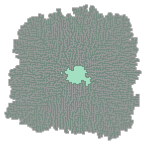

In [21]:
polygon